In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [ ]:
(ds_train, ds_test), ds_info =tfds.load('mnist', split=['train', 'test'], shuffle_files=False,as_supervised=True,with_info=True,)


Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
def normalize_img(image, label):
  return tf.cast(image, tf.float32) /255., label
ds_train = ds_train.map(normalize_img)
ds_train = ds_train.batch(128)
ds_test = ds_test.map(normalize_img)
ds_test = ds_test.batch(128)

In [ ]:
model = tf.keras.models.Sequential([
tf.keras.layers.Flatten(input_shape=(28,28)),
tf.keras.layers.Dense(64,activation='relu'),tf.keras.layers.Dense(10,activation='softmax')])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(0.01),loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],)

In [ ]:
history = model.fit(ds_train,epochs=20,batch_size=128,validation_data=ds_test,)

Epoch 1/20
469/469 [==============================] - 8s 16ms/step - loss: 1.2578 - sparse_categorical_accuracy: 0.6938 - val_loss: 0.6786 - val_sparse_categorical_accuracy: 0.8495
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 0.5734 - sparse_categorical_accuracy: 0.8604 - val_loss: 0.4664 - val_sparse_categorical_accuracy: 0.8841
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.4483 - sparse_categorical_accuracy: 0.8827 - val_loss: 0.3940 - val_sparse_categorical_accuracy: 0.8988
Epoch 4/20
469/469 [==============================] - 4s 9ms/step - loss: 0.3948 - sparse_categorical_accuracy: 0.8936 - val_loss: 0.3565 - val_sparse_categorical_accuracy: 0.9059
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 0.3634 - sparse_categorical_accuracy: 0.9006 - val_loss: 0.3325 - val_sparse_categorical_accuracy: 0.9104
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 0.3417 - sparse_categoric

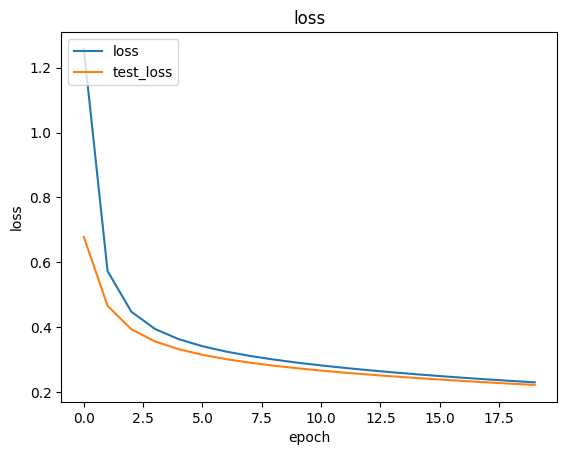

79/79 [==============================] - 1s 9ms/step - loss: 0.2225 - sparse_categorical_accuracy: 0.9363
Test accuracy: 0.9362999796867371


In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss','test_loss'], loc='upper left')
plt.show()
# Evaluate the model
scores = model.evaluate(ds_test)
print("Test accuracy:",scores[1])